In [1]:
from pyspark.sql import Row
from pyspark.sql.functions import col

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
sns.set(style="whitegrid")
dtype={'user_id': int}

from IPython.display import HTML

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='azeraz656', api_key='S1A1o5me5mrLSnuw6ZK0')

import folium
from folium import plugins
from folium.plugins import HeatMap

#sc.setSystemProperty('spark.executor.memory', '3g')
#sc.setSystemProperty('spark.driver.memory', '3g')

from subprocess import check_output

lim = 2000
if lim>0:
    data = sqlContext.read.format('csv').options(header='true', inferSchema='true').load('./input/ILtest.csv')
    data = data.select(data["id"], data["stop_date"], data["stop_time"], data["driver_gender"], data["driver_age"], data["driver_race"], data["search_conducted"], data["contraband_found"], data["stop_outcome"], data["vehicle_type"], data["violation"])
    dataWA = sqlContext.read.format('csv').options(header='true', inferSchema='true').load('./input/WAtest.csv')
    dataWA = dataWA.select(dataWA["id"], dataWA["stop_date"], dataWA["stop_time"], dataWA["driver_gender"], dataWA["driver_age"], dataWA["driver_race"], dataWA["search_conducted"], dataWA["contraband_found"], dataWA["stop_outcome"], dataWA["lat"], dataWA["lon"], dataWA["violation"])
else:
    data = sqlContext.read.format('csv').options(header='true', inferSchema='true').load('./input/IL.csv')
    dataWA = sqlContext.read.format('csv').options(header='true', inferSchema='true').load('./input/WAtest.csv')
print(data)
print()
print(dataWA)


DataFrame[id: string, stop_date: timestamp, stop_time: string, driver_gender: string, driver_age: double, driver_race: string, search_conducted: boolean, contraband_found: boolean, stop_outcome: string, vehicle_type: string, violation: string]

DataFrame[id: string, stop_date: timestamp, stop_time: string, driver_gender: string, driver_age: double, driver_race: string, search_conducted: boolean, contraband_found: boolean, stop_outcome: string, lat: double, lon: double, violation: string]


In [2]:
data.select(data['id'], data['driver_race'], data['stop_time']).show()

+--------------+-----------+---------+
|            id|driver_race|stop_time|
+--------------+-----------+---------+
|IL-2004-000001|      White|    00:02|
|IL-2004-000002|      White|    00:07|
|IL-2004-000003|      White|    00:14|
|IL-2004-000004|      Black|    00:15|
|IL-2004-000005|      Black|    00:15|
|IL-2004-000006|      White|    00:20|
|IL-2004-000007|      White|    00:20|
|IL-2004-000008|   Hispanic|    00:21|
|IL-2004-000009|   Hispanic|    00:23|
|IL-2004-000010|      White|    00:24|
|IL-2004-000011|      White|    00:25|
|IL-2004-000012|      White|    00:25|
|IL-2004-000013|      White|    00:27|
|IL-2004-000014|      White|    00:30|
|IL-2004-000015|      White|    00:30|
|IL-2004-000016|      Black|    00:30|
|IL-2004-000017|      Black|    00:34|
|IL-2004-000018|      White|    00:35|
|IL-2004-000019|      White|    00:35|
|IL-2004-000020|      White|    00:35|
+--------------+-----------+---------+
only showing top 20 rows



In [2]:
Cols = data.columns
print(Cols)
#N_controls = data.count()
#print(N_controls)

#Ages = data.select(data["driver_age"]).distinct().collect()
#print(Ages)
#Races = np.sort(data['driver_race'].unique()).tolist()
#Violations = np.sort(data['violation'].unique()).tolist()
#Vehicles = np.sort(data['vehicle_type'].unique()).tolist()
#data['stop_time'] = data['stop_time'].astype(str) # Put the hours in string format
#data['search_conducted'] = data['search_conducted'].astype(str)
#data['contraband_found'] = data['contraband_found'].astype(str)  
# ------------------------------------------------------------------------------------------------------------

['id', 'stop_date', 'stop_time', 'driver_gender', 'driver_age', 'driver_race', 'search_conducted', 'contraband_found', 'stop_outcome', 'vehicle_type', 'violation']


In [3]:
#deel 1 van deze stap
#data.drop(data[data.stop_time=='nan'].index, inplace=True)
#data = data.drop(data["stop_time"=="nan"])
#print(data.count())

#data.select(data["stop_time"], data["driver_gender"]).show()

In [4]:
# deel 2 van deze stap
total_resultWA = dataWA

In [5]:
# deel 2 van deze stap
test = data.select(data["stop_time"], data["id"]).rdd.map(lambda x : (x[0][:2], x[1])).toDF()

namedtest = test.selectExpr("_1 as hour", "_2 as id").limit(lim)
data2 = data.limit(lim)

print(namedtest.count())

df1 = data2.alias('df1')
df2 = namedtest.alias('df2')
result = df2.join(df1, df2.id == df1.id, 'inner').drop(df1.id)
print(result.count())
#.dropDuplicates()

#data2.createOrReplaceTempView("data2")
#namedtest.createOrReplaceTempView("namedtest")

#result = sqlContext.sql("SELECT * FROM data2 d JOIN namedtest n ON d.id = n.id")

resultdeel = result.select(result["df2.id"], result["hour"], result["stop_time"])

resultdeel.show()
#data2.show()
print(resultdeel.count())
print(data2.count())

1241
1241
+--------------+----+---------+
|            id|hour|stop_time|
+--------------+----+---------+
|IL-2004-000001|  00|    00:02|
|IL-2004-000002|  00|    00:07|
|IL-2004-000003|  00|    00:14|
|IL-2004-000004|  00|    00:15|
|IL-2004-000005|  00|    00:15|
|IL-2004-000006|  00|    00:20|
|IL-2004-000007|  00|    00:20|
|IL-2004-000008|  00|    00:21|
|IL-2004-000009|  00|    00:23|
|IL-2004-000010|  00|    00:24|
|IL-2004-000011|  00|    00:25|
|IL-2004-000012|  00|    00:25|
|IL-2004-000013|  00|    00:27|
|IL-2004-000014|  00|    00:30|
|IL-2004-000015|  00|    00:30|
|IL-2004-000016|  00|    00:30|
|IL-2004-000017|  00|    00:34|
|IL-2004-000018|  00|    00:35|
|IL-2004-000019|  00|    00:35|
|IL-2004-000020|  00|    00:35|
+--------------+----+---------+
only showing top 20 rows

1241
1241


In [6]:
# deel 3 van deze stap
#data['vehicle_brand'] = data['vehicle_type'].map(lambda x : x[:3])

vehicle_brands = data.select(data["vehicle_type"], data["id"]).rdd.map(lambda x : (x[0][:3], x[1])).toDF()

named_vehicle_brands = vehicle_brands.selectExpr("_1 as vehicle_brand", "_2 as id").limit(lim)
#result_ids = result.selectExpr("id as id").limit(10)

named_vehicle_brands.show()

result_ids_alias = result.alias('result_ids_alias')
named_vehicle_brands_alias = named_vehicle_brands.alias('named_vehicle_brands_alias')

total_result = named_vehicle_brands_alias.join(result_ids_alias, named_vehicle_brands_alias.id == result_ids_alias.id, 'left').drop(result_ids_alias.id)

#data2.createOrReplaceTempView("data2")
#namedtest.createOrReplaceTempView("namedtest")

#result = sqlContext.sql("SELECT * FROM data2 JOIN namedtest n ON data2.id = n.id")

resultdeel = total_result.select(total_result["named_vehicle_brands_alias.id"], total_result["vehicle_brand"], total_result["stop_time"], total_result["hour"])
resultdeel.show()
print(resultdeel.count())

+-------------+--------------+
|vehicle_brand|            id|
+-------------+--------------+
|          Old|IL-2004-000001|
|          Lin|IL-2004-000002|
|          Che|IL-2004-000003|
|          Bui|IL-2004-000004|
|          Old|IL-2004-000005|
|          For|IL-2004-000006|
|          Pon|IL-2004-000007|
|          Che|IL-2004-000008|
|          Hyu|IL-2004-000009|
|          For|IL-2004-000010|
|          Maz|IL-2004-000011|
|          Che|IL-2004-000012|
|          Bui|IL-2004-000013|
|          Che|IL-2004-000014|
|          Toy|IL-2004-000015|
|          Che|IL-2004-000016|
|          Sub|IL-2004-000017|
|          Mer|IL-2004-000018|
|          Che|IL-2004-000019|
|          Pon|IL-2004-000020|
+-------------+--------------+
only showing top 20 rows

+--------------+-------------+---------+----+
|            id|vehicle_brand|stop_time|hour|
+--------------+-------------+---------+----+
|IL-2004-000001|          Old|    00:02|  00|
|IL-2004-000002|          Lin|    00:07|  00|


**gender, violation, driver race, stop outcome**

               - ['driver_gender'] : ratio male/female
               - ['driver_ratio'] : split between races 
               - ['violation'] : split between violations
               - ['stop_outcome'] : split between outcomes (Citation, Written Warning)

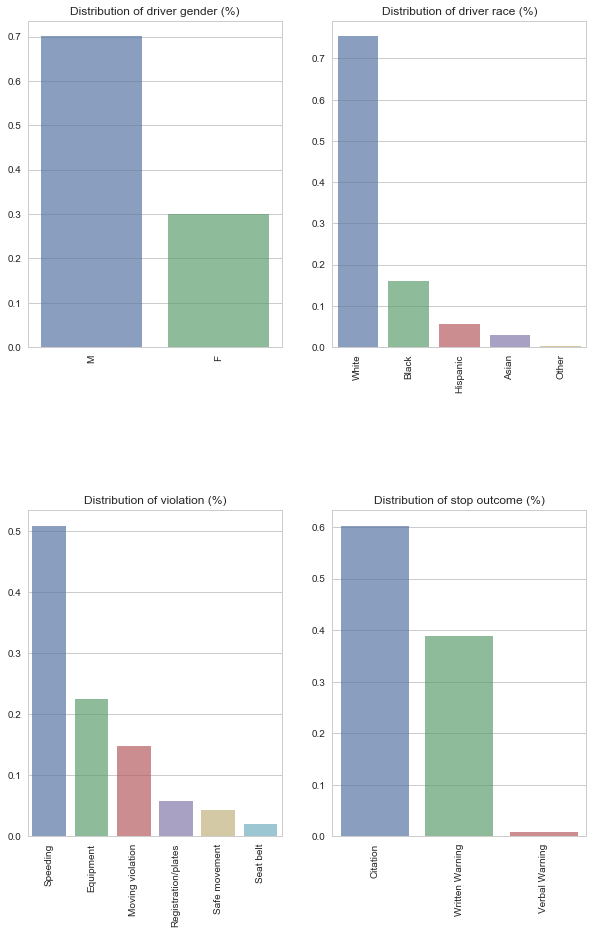

In [7]:
pandasdf = total_result.toPandas()

fig1 = plt.subplots(figsize=(10,15))
cat = ['driver_gender','driver_race','violation','stop_outcome']
length=len(cat)
for i,j in itertools.zip_longest(cat,range(length)): 
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    #pandas used: value_counts() not available in Spark and hard to do using lambdas
    df_count = pandasdf[i].value_counts()
    l = total_result.select(total_result[i]).count()
    df_perc = df_count/l
    sns.barplot(df_perc.index, df_perc.values, alpha=0.7)
    plt.xticks(rotation=90)
    plt.title("Distribution of " + i.replace('_',' ')+ " (%)")
    

**Arrests per hour of the day**

In [8]:
pandasdf = total_result.toPandas()

#pandas
Arrests_per_hour = pandasdf.groupby(['hour'])['id'].count()
Arrests = total_result.count()

Arrests_per_hour_perc = Arrests_per_hour/Arrests*100

data = [go.Bar(
            x=Arrests_per_hour_perc.index,
            y=Arrests_per_hour_perc.values
    )]

py.iplot(data, filename='basic-bazaferr')

**Distribution of driver age with driver race**

In [9]:
tra = total_result.select('driver_race').rdd.map(lambda r: r[0]).collect()
trage = total_result.select('driver_age').rdd.map(lambda r: r[0]).collect()
tr = total_result.select('driver_race').distinct().rdd.map(lambda r: r[0]).collect()

data = []
for i in range(0,len(tr)):
    #kkk =df['driver_age'][df['driver_age'] == pd.unique(df['driver_age'])[i]]
    #print(kkk)
    
    listindex = []
    listrace = []
    listage = []
    
    currentrace = tr[i]
    for s in range(0, total_result.count()):
        if (tra[s] == currentrace):
            listindex.append(s)
            listage.append(float(trage[s]))
            listrace.append(currentrace)
            
    xyz = pd.Series(listrace, listindex)
    uip = pd.Series(listage, listindex)
    
    trace = {
            "type": 'violin',
            "x": xyz,
            "y": uip,
            "name": currentrace,
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)

        
fig = {
    "data": data,
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}


py.iplot(fig, filename='multiplekji', validate = False)



In [10]:
cords_raw = total_resultWA.filter(total_resultWA.stop_outcome == "Arrest or Citation").select(total_resultWA["lat"], total_resultWA["lon"])
cords = cords_raw.where(cords_raw["lat"].isNotNull() & cords_raw["lon"].isNotNull())
cords.show()

lat = cords.select("lat").rdd.flatMap(lambda x: x).collect()
lon = cords.select("lon").rdd.flatMap(lambda x: x).collect()

m = folium.Map(
    location=[47.055536, -122.440368],
    zoom_start=7,
    tiles='Mapbox Bright'
)

for x in range(cords.count()):
    folium.Marker(
        location=[lat[x], lon[x]],
        icon=folium.Icon(icon='cloud')
    ).add_to(m)

m

+-----------+------------+
|        lat|         lon|
+-----------+------------+
|  47.414073| -122.197144|
|  47.240716| -122.356301|
|  47.619195| -122.328252|
|  47.240716| -122.356301|
|  47.978414| -122.147555|
|   47.95189| -122.102727|
|  46.196569|-119.1606675|
|   47.57139| -122.319901|
|  47.610495| -122.628756|
|  47.240716| -122.356301|
|  47.571391|  -122.66187|
|  47.027837| -122.931531|
|   47.83533| -122.302751|
|  45.683082| -122.593698|
|  46.390412| -122.901838|
| 47.1451165| -119.283357|
|  47.067947| -122.716916|
|  47.240741| -122.254122|
|46.69770209|-120.4433686|
|  48.687766| -122.398776|
+-----------+------------+
only showing top 20 rows



In [11]:
hm = folium.Map(
    location=[47.055536, -122.440368],
    zoom_start=7,
    tiles='openstreetmap'
)

arr = np.column_stack((lat, lon))

# plot heatmap
hm.add_children(plugins.HeatMap(arr, radius=15))
hm


C:\Users\daank\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Method `add_children` is deprecated. Please use `add_child` instead.



**Repartition of stop outcome for each driver race for IL and WA** 

In [12]:
#white IL values
white = total_result.filter(total_result.driver_race == 'White')

white_citation = white.filter(white.stop_outcome == 'Citation')
white_writtenwarning = white.filter(white.stop_outcome == 'Written Warning')
white_verbalwarning = white.filter(white.stop_outcome == 'Verbal Warning')

white_count = white.count()
white_citation_count = white_citation.count()
white_writtenwarning_count = white_writtenwarning.count()
white_verbalwarning_count = white_verbalwarning.count()

white_citation_perc = white_citation_count / white_count
white_writtenwarning_perc = white_writtenwarning_count / white_count
white_verbalwarning_perc = white_verbalwarning_count / white_count

#black IL values
black = total_result.filter(total_result.driver_race == 'Black')

black_citation = black.filter(black.stop_outcome == 'Citation')
black_writtenwarning = black.filter(black.stop_outcome == 'Written Warning')
black_verbalwarning = black.filter(black.stop_outcome == 'Verbal Warning')

black_count = black.count()
black_citation_count = black_citation.count()
black_writtenwarning_count = black_writtenwarning.count()
black_verbalwarning_count = black_verbalwarning.count()

black_citation_perc = black_citation_count / black_count
black_writtenwarning_perc = black_writtenwarning_count / black_count
black_verbalwarning_perc = black_verbalwarning_count / black_count

#asian IL values
asian = total_result.filter(total_result.driver_race == 'Asian')

asian_citation = asian.filter(asian.stop_outcome == 'Citation')
asian_writtenwarning = asian.filter(asian.stop_outcome == 'Written Warning')
asian_verbalwarning = asian.filter(asian.stop_outcome == 'Verbal Warning')

asian_count = asian.count()
asian_citation_count = asian_citation.count()
asian_writtenwarning_count = asian_writtenwarning.count()
asian_verbalwarning_count = asian_verbalwarning.count()

asian_citation_perc = asian_citation_count / asian_count
asian_writtenwarning_perc = asian_writtenwarning_count / asian_count
asian_verbalwarning_perc = asian_verbalwarning_count / asian_count

#hispanic IL values
hispanic = total_result.filter(total_result.driver_race == 'Hispanic')

hispanic_citation = hispanic.filter(hispanic.stop_outcome == 'Citation')
hispanic_writtenwarning = hispanic.filter(hispanic.stop_outcome == 'Written Warning')
hispanic_verbalwarning = hispanic.filter(hispanic.stop_outcome == 'Verbal Warning')

hispanic_count = hispanic.count()
hispanic_citation_count = hispanic_citation.count()
hispanic_writtenwarning_count = hispanic_writtenwarning.count()
hispanic_verbalwarning_count = hispanic_verbalwarning.count()

hispanic_citation_perc = hispanic_citation_count / hispanic_count
hispanic_writtenwarning_perc = hispanic_writtenwarning_count / hispanic_count
hispanic_verbalwarning_perc = hispanic_verbalwarning_count / hispanic_count

#other IL values
other = total_result.filter(total_result.driver_race == 'Other')

other_citation = other.filter(other.stop_outcome == 'Citation')
other_writtenwarning = other.filter(other.stop_outcome == 'Written Warning')
other_verbalwarning = other.filter(other.stop_outcome == 'Verbal Warning')

other_count = other.count()
other_citation_count = other_citation.count()
other_writtenwarning_count = other_writtenwarning.count()
other_verbalwarning_count = other_verbalwarning.count()

other_citation_perc = other_citation_count / other_count
other_writtenwarning_perc = other_writtenwarning_count / other_count
other_verbalwarning_perc = other_verbalwarning_count / other_count

trace_white = go.Bar(
    x=['Citation', 'Written Warning', 'Verbal Warning'],
    y=[white_citation_perc, white_writtenwarning_perc, white_verbalwarning_perc],
    name='White'
)
trace_black = go.Bar(
    x=['Citation', 'Written Warning', 'Verbal Warning'],
    y=[black_citation_perc, black_writtenwarning_perc, black_verbalwarning_perc],
    name='Black'
)
trace_asian = go.Bar(
    x=['Citation', 'Written Warning', 'Verbal Warning'],
    y=[asian_citation_perc, asian_writtenwarning_perc, asian_verbalwarning_perc],
    name='Asian'
)
trace_hispanic = go.Bar(
    x=['Citation', 'Written Warning', 'Verbal Warning'],
    y=[hispanic_citation_perc, hispanic_writtenwarning_perc, hispanic_verbalwarning_perc],
    name='Hispanic'
)
trace_other = go.Bar(
    x=['Citation', 'Written Warning', 'Verbal Warning'],
    y=[other_citation_perc, other_writtenwarning_perc, other_verbalwarning_perc],
    name='Other'
)
data = [trace_white, trace_black, trace_asian, trace_hispanic, trace_other]
layout = go.Layout(
    title='Repartition of stop outcome for each driver race for IL',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='groupejklhl-bar')



In [13]:
#white WA values
whiteWA = total_resultWA.filter(total_resultWA.driver_race == 'White')

white_citationWA = whiteWA.filter(whiteWA.stop_outcome == 'Arrest or Citation')
white_writtenwarningWA = whiteWA.filter(whiteWA.stop_outcome == 'Written Warning')
white_verbalwarningWA = whiteWA.filter(whiteWA.stop_outcome == 'Verbal Warning')

white_countWA = whiteWA.count()
white_citation_countWA = white_citationWA.count()
white_writtenwarning_countWA = white_writtenwarningWA.count()
white_verbalwarning_countWA = white_verbalwarningWA.count()

white_citation_percWA = white_citation_countWA / white_countWA
white_writtenwarning_percWA = white_writtenwarning_countWA / white_countWA
white_verbalwarning_percWA = white_verbalwarning_countWA / white_countWA

#black WA values
blackWA = total_resultWA.filter(total_resultWA.driver_race == 'Black')

black_citationWA = blackWA.filter(blackWA.stop_outcome == 'Arrest or Citation')
black_writtenwarningWA = blackWA.filter(blackWA.stop_outcome == 'Written Warning')
black_verbalwarningWA = blackWA.filter(blackWA.stop_outcome == 'Verbal Warning')

black_countWA = blackWA.count()
black_citation_countWA = black_citationWA.count()
black_writtenwarning_countWA = black_writtenwarningWA.count()
black_verbalwarning_countWA = black_verbalwarningWA.count()

black_citation_percWA = black_citation_countWA / black_countWA
black_writtenwarning_percWA = black_writtenwarning_countWA / black_countWA
black_verbalwarning_percWA = black_verbalwarning_countWA / black_countWA

#asian WA values
asianWA = total_resultWA.filter(total_resultWA.driver_race == 'Asian')

asian_citationWA = asianWA.filter(asianWA.stop_outcome == 'Arrest or Citation')
asian_writtenwarningWA = asianWA.filter(asianWA.stop_outcome == 'Written Warning')
asian_verbalwarningWA = asianWA.filter(asianWA.stop_outcome == 'Verbal Warning')

asian_countWA = asianWA.count()
asian_citation_countWA = asian_citationWA.count()
asian_writtenwarning_countWA = asian_writtenwarningWA.count()
asian_verbalwarning_countWA = asian_verbalwarningWA.count()

asian_citation_percWA = asian_citation_countWA / asian_countWA
asian_writtenwarning_percWA = asian_writtenwarning_countWA / asian_countWA
asian_verbalwarning_percWA = asian_verbalwarning_countWA / asian_countWA

#hispanic WA values
hispanicWA = total_resultWA.filter(total_resultWA.driver_race == 'Hispanic')

hispanic_citationWA = hispanicWA.filter(hispanicWA.stop_outcome == 'Arrest or Citation')
hispanic_writtenwarningWA = hispanicWA.filter(hispanicWA.stop_outcome == 'Written Warning')
hispanic_verbalwarningWA = hispanicWA.filter(hispanicWA.stop_outcome == 'Verbal Warning')

hispanic_countWA = hispanicWA.count()
hispanic_citation_countWA = hispanic_citationWA.count()
hispanic_writtenwarning_countWA = hispanic_writtenwarningWA.count()
hispanic_verbalwarning_countWA = hispanic_verbalwarningWA.count()

hispanic_citation_percWA = hispanic_citation_countWA / hispanic_countWA
hispanic_writtenwarning_percWA = hispanic_writtenwarning_countWA / hispanic_countWA
hispanic_verbalwarning_percWA = hispanic_verbalwarning_countWA / hispanic_countWA

#other WA values
otherWA = total_resultWA.filter(total_resultWA.driver_race == 'Other')

other_citationWA = otherWA.filter(otherWA.stop_outcome == 'Arrest or Citation')
other_writtenwarningWA = otherWA.filter(otherWA.stop_outcome == 'Written Warning')
other_verbalwarningWA = otherWA.filter(otherWA.stop_outcome == 'Verbal Warning')

other_countWA = otherWA.count()
other_citation_countWA = other_citationWA.count()
other_writtenwarning_countWA = other_writtenwarningWA.count()
other_verbalwarning_countWA = other_verbalwarningWA.count()

other_citation_percWA = other_citation_countWA / other_countWA
other_writtenwarning_percWA = other_writtenwarning_countWA / other_countWA
other_verbalwarning_percWA = other_verbalwarning_countWA / other_countWA

trace_white = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[white_citation_percWA, white_writtenwarning_percWA, white_verbalwarning_percWA],
    name='White'
)
trace_black = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[black_citation_percWA, black_writtenwarning_percWA, black_verbalwarning_percWA],
    name='Black'
)
trace_asian = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[asian_citation_percWA, asian_writtenwarning_percWA, asian_verbalwarning_percWA],
    name='Asian'
)
trace_hispanic = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[hispanic_citation_percWA, hispanic_writtenwarning_percWA, hispanic_verbalwarning_percWA],
    name='Hispanic'
)
trace_other = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[other_citation_percWA, other_writtenwarning_percWA, other_verbalwarning_percWA],
    name='Other'
)
data = [trace_white, trace_black, trace_asian, trace_hispanic, trace_other]
layout = go.Layout(
    title='Repartition of stop outcome for each driver race for WA',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bygyiar')



**Ratio of search conducted for each driver race**

In [14]:
#white IL values

white_search_conducted_true = white.filter(white.search_conducted == "TRUE")
white_search_conducted_false = white.filter(white.search_conducted == "FALSE")

white_search_conducted_true_count = white_search_conducted_true.count()
white_search_conducted_false_count = white_search_conducted_false.count()

white_search_conducted_true_perc = white_search_conducted_true_count / white_count
white_search_conducted_false_perc = white_search_conducted_false_count / white_count

#black IL values

black_search_conducted_true = black.filter(black.search_conducted == "TRUE")
black_search_conducted_false = black.filter(black.search_conducted == "FALSE")

black_search_conducted_true_count = black_search_conducted_true.count()
black_search_conducted_false_count = black_search_conducted_false.count()

black_search_conducted_true_perc = black_search_conducted_true_count / black_count
black_search_conducted_false_perc = black_search_conducted_false_count / black_count

#asian IL values

asian_search_conducted_true = asian.filter(asian.search_conducted == "TRUE")
asian_search_conducted_false = asian.filter(asian.search_conducted == "FALSE")

asian_search_conducted_true_count = asian_search_conducted_true.count()
asian_search_conducted_false_count = asian_search_conducted_false.count()

asian_search_conducted_true_perc = asian_search_conducted_true_count / asian_count
asian_search_conducted_false_perc = asian_search_conducted_false_count / asian_count

#hispanic IL values

hispanic_search_conducted_true = hispanic.filter(hispanic.search_conducted == "TRUE")
hispanic_search_conducted_false = hispanic.filter(hispanic.search_conducted == "FALSE")

hispanic_search_conducted_true_count = hispanic_search_conducted_true.count()
hispanic_search_conducted_false_count = hispanic_search_conducted_false.count()

hispanic_search_conducted_true_perc = hispanic_search_conducted_true_count / hispanic_count
hispanic_search_conducted_false_perc = hispanic_search_conducted_false_count / hispanic_count

#other IL values

other_search_conducted_true = other.filter(other.search_conducted == "TRUE")
other_search_conducted_false = other.filter(other.search_conducted == "FALSE")

other_search_conducted_true_count = other_search_conducted_true.count()
other_search_conducted_false_count = other_search_conducted_false.count()

other_search_conducted_true_perc = other_search_conducted_true_count / other_count
other_search_conducted_false_perc = other_search_conducted_false_count / other_count

trace_white = go.Bar(
    x=['True', 'False'],
    y=[white_search_conducted_true_perc, white_search_conducted_false_perc],
    name='White'
)
trace_black = go.Bar(
    x=['True', 'False'],
    y=[black_search_conducted_true_perc, black_search_conducted_false_perc],
    name='Black'
)
trace_asian = go.Bar(
    x=['True', 'False'],
    y=[asian_search_conducted_true_perc, asian_search_conducted_false_perc],
    name='Asian'
)
trace_hispanic = go.Bar(
    x=['True', 'False'],
    y=[hispanic_search_conducted_true_perc, hispanic_search_conducted_false_perc],
    name='Hispanic'
)
trace_other = go.Bar(
    x=['True', 'False'],
    y=[other_search_conducted_true_perc, other_search_conducted_false_perc],
    name='Other'
)

data = [trace_white, trace_black, trace_asian, trace_hispanic, trace_other]
layout = go.Layout(
    title='IL search conducted per race',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-barjgkgj')

In [15]:
#white WA values

white_search_conducted_trueWA = whiteWA.filter(whiteWA.search_conducted == "TRUE")
white_search_conducted_falseWA = whiteWA.filter(whiteWA.search_conducted == "FALSE")

white_search_conducted_true_countWA = white_search_conducted_trueWA.count()
white_search_conducted_false_countWA = white_search_conducted_falseWA.count()

white_search_conducted_true_percWA = white_search_conducted_true_countWA / white_countWA
white_search_conducted_false_percWA = white_search_conducted_false_countWA / white_countWA

#black WA values

black_search_conducted_trueWA = blackWA.filter(blackWA.search_conducted == "TRUE")
black_search_conducted_falseWA = blackWA.filter(blackWA.search_conducted == "FALSE")

black_search_conducted_true_countWA = black_search_conducted_trueWA.count()
black_search_conducted_false_countWA = black_search_conducted_falseWA.count()

black_search_conducted_true_percWA = black_search_conducted_true_countWA / black_countWA
black_search_conducted_false_percWA = black_search_conducted_false_countWA / black_countWA

#asian WA values

asian_search_conducted_trueWA = asianWA.filter(asianWA.search_conducted == "TRUE")
asian_search_conducted_falseWA = asianWA.filter(asianWA.search_conducted == "FALSE")

asian_search_conducted_true_countWA = asian_search_conducted_trueWA.count()
asian_search_conducted_false_countWA = asian_search_conducted_falseWA.count()

asian_search_conducted_true_percWA = asian_search_conducted_true_countWA / asian_countWA
asian_search_conducted_false_percWA = asian_search_conducted_false_countWA / asian_countWA

#hispanic WA values

hispanic_search_conducted_trueWA = hispanicWA.filter(hispanicWA.search_conducted == "TRUE")
hispanic_search_conducted_falseWA = hispanicWA.filter(hispanicWA.search_conducted == "FALSE")

hispanic_search_conducted_true_countWA = hispanic_search_conducted_trueWA.count()
hispanic_search_conducted_false_countWA = hispanic_search_conducted_falseWA.count()

hispanic_search_conducted_true_percWA = hispanic_search_conducted_true_countWA / hispanic_countWA
hispanic_search_conducted_false_percWA = hispanic_search_conducted_false_countWA / hispanic_countWA

#other WA values

other_search_conducted_trueWA = otherWA.filter(otherWA.search_conducted == "TRUE")
other_search_conducted_falseWA = otherWA.filter(otherWA.search_conducted == "FALSE")

other_search_conducted_true_countWA = other_search_conducted_trueWA.count()
other_search_conducted_false_countWA = other_search_conducted_falseWA.count()

other_search_conducted_true_percWA = other_search_conducted_true_countWA / other_countWA
other_search_conducted_false_percWA = other_search_conducted_false_countWA / other_countWA

trace_white = go.Bar(
    x=['True', 'False'],
    y=[white_search_conducted_true_percWA, white_search_conducted_false_percWA],
    name='White'
)
trace_black = go.Bar(
    x=['True', 'False'],
    y=[black_search_conducted_true_percWA, black_search_conducted_false_percWA],
    name='Black'
)
trace_asian = go.Bar(
    x=['True', 'False'],
    y=[asian_search_conducted_true_percWA, asian_search_conducted_false_percWA],
    name='Asian'
)
trace_hispanic = go.Bar(
    x=['True', 'False'],
    y=[hispanic_search_conducted_true_percWA, hispanic_search_conducted_false_percWA],
    name='Hispanic'
)
trace_other = go.Bar(
    x=['True', 'False'],
    y=[other_search_conducted_true_percWA, other_search_conducted_false_percWA],
    name='Other'
)

data = [trace_white, trace_black, trace_asian, trace_hispanic, trace_other]
layout = go.Layout(
    title='WA search conducted per race',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bajhkr')

**Ratio of contraband found when search is conducted for WA and IL**

In [16]:
#white IL values

white_search_conducted = white.filter(white.search_conducted == "TRUE")
white_contraband_found_true = white_search_conducted.filter(white.contraband_found == "TRUE")

white_search_conducted_count = white_search_conducted.count()
white_contraband_found_true_count = white_contraband_found_true.count()

white_contraband_found_true_perc = white_contraband_found_true_count / white_search_conducted_count

#black IL values

black_search_conducted = black.filter(black.search_conducted == "TRUE")
black_contraband_found_true = black_search_conducted.filter(black.contraband_found == "TRUE")

black_search_conducted_count = black_search_conducted.count()
black_contraband_found_true_count = black_contraband_found_true.count()

black_contraband_found_true_perc = black_contraband_found_true_count / black_search_conducted_count

#asian IL values

asian_search_conducted = asian.filter(asian.search_conducted == "TRUE")
asian_contraband_found_true = asian_search_conducted.filter(asian.contraband_found == "TRUE")

asian_search_conducted_count = asian_search_conducted.count()
asian_contraband_found_true_count = asian_contraband_found_true.count()

asian_contraband_found_true_perc = asian_contraband_found_true_count / asian_search_conducted_count

#hispanic IL values

hispanic_search_conducted = hispanic.filter(hispanic.search_conducted == "TRUE")
hispanic_contraband_found_true = hispanic_search_conducted.filter(hispanic.contraband_found == "TRUE")

hispanic_search_conducted_count = hispanic_search_conducted.count()
hispanic_contraband_found_true_count = hispanic_contraband_found_true.count()

hispanic_contraband_found_true_perc = hispanic_contraband_found_true_count / hispanic_search_conducted_count

#other IL values

other_search_conducted = other.filter(other.search_conducted == "TRUE")
other_contraband_found_true = other_search_conducted.filter(other.contraband_found == "TRUE")

other_search_conducted_count = other_search_conducted.count()
other_contraband_found_true_count = other_contraband_found_true.count()

#other_contraband_found_true_perc = other_contraband_found_true_count / other_search_conducted_count
other_contraband_found_true_perc = other_contraband_found_true_count / 1

data = [go.Bar(
            x=['White', 'Black', 'Asian', 'Hispanic', 'Other'],
            y=[white_contraband_found_true_perc, black_contraband_found_true_perc, asian_contraband_found_true_perc, hispanic_contraband_found_true_perc, other_contraband_found_true_perc]
    )]

print("Ratio of contraband found when search is conducted for IL")
py.iplot(data, filename='basic-barroi')

Ratio of contraband found when search is conducted for IL


In [17]:
#white WA values

white_search_conductedWA = whiteWA.filter(whiteWA.search_conducted == "TRUE")
white_contraband_found_trueWA = white_search_conductedWA.filter(whiteWA.contraband_found == "TRUE")

white_search_conducted_countWA = white_search_conductedWA.count()
white_contraband_found_true_countWA = white_contraband_found_trueWA.count()

white_contraband_found_true_percWA = white_contraband_found_true_countWA / white_search_conducted_countWA

#black WA values

black_search_conductedWA = blackWA.filter(blackWA.search_conducted == "TRUE")
black_contraband_found_trueWA = black_search_conductedWA.filter(blackWA.contraband_found == "TRUE")

black_search_conducted_countWA = black_search_conductedWA.count()
black_contraband_found_true_countWA = black_contraband_found_trueWA.count()

black_contraband_found_true_percWA = black_contraband_found_true_countWA / black_search_conducted_countWA

#asian WA values

asian_search_conductedWA = asianWA.filter(asianWA.search_conducted == "TRUE")
asian_contraband_found_trueWA = asian_search_conductedWA.filter(asianWA.contraband_found == "TRUE")

asian_search_conducted_countWA = asian_search_conductedWA.count()
asian_contraband_found_true_countWA = asian_contraband_found_trueWA.count()

asian_contraband_found_true_percWA = asian_contraband_found_true_countWA / asian_search_conducted_countWA

#hispanic WA values

hispanic_search_conductedWA = hispanicWA.filter(hispanicWA.search_conducted == "TRUE")
hispanic_contraband_found_trueWA = hispanic_search_conductedWA.filter(hispanicWA.contraband_found == "TRUE")

hispanic_search_conducted_countWA = hispanic_search_conductedWA.count()
hispanic_contraband_found_true_countWA = hispanic_contraband_found_trueWA.count()

hispanic_contraband_found_true_percWA = hispanic_contraband_found_true_countWA / hispanic_search_conducted_countWA

#other WA values

other_search_conductedWA = otherWA.filter(otherWA.search_conducted == "TRUE")
other_contraband_found_trueWA = other_search_conductedWA.filter(otherWA.contraband_found == "TRUE")

other_search_conducted_countWA = other_search_conductedWA.count()
other_contraband_found_true_countWA = other_contraband_found_trueWA.count()

#other_contraband_found_true_percWA = other_contraband_found_true_countWA / other_search_conducted_countWA
#NOG VERANDEREN
other_contraband_found_true_percWA = other_contraband_found_true_count / 1

print("Ratio of contraband found when search is conducted for WA")
data = [go.Bar(
            x=['White', 'Black', 'Asian', 'Hispanic', 'Other'],
            y=[white_contraband_found_true_percWA, black_contraband_found_true_percWA, asian_contraband_found_true_percWA, hispanic_contraband_found_true_percWA, other_contraband_found_true_percWA]
    )]

py.iplot(data, filename='basic-bardzr')

Ratio of contraband found when search is conducted for WA


In [18]:
input_form = """
<div style="background-color:#e8bf99; width:300px; padding:20px;">
Race:
<select id="var_value">
  <option value="Black">Black</option>
  <option value="White">White</option>
  <option value="Asian">Asian</option>
  <option value="Hispanic">Hispanic</option>
  <option value="Other">Other</option>
</select>
<button onclick="set_value()">Set Race</button>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var var_value = document.getElementById('var_value').value;
        var command = "race = '" + var_value + "'";
        console.log("Executing Command: " + command);
        
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
    }
</script>
"""

HTML(input_form + javascript)

In [22]:
#IL values
il_val = total_result.filter(total_result.driver_race == race)

il_val_citation = il_val.filter(il_val.stop_outcome == 'Citation')
il_val_writtenwarning = il_val.filter(il_val.stop_outcome == 'Written Warning')
il_val_verbalwarning = il_val.filter(il_val.stop_outcome == 'Verbal Warning')

il_val_count = il_val.count()
il_val_citation_count = il_val_citation.count()
il_val_writtenwarning_count = il_val_writtenwarning.count()
il_val_verbalwarning_count = il_val_verbalwarning.count()

il_val_citation_perc = il_val_citation_count / il_val_count
il_val_writtenwarning_perc = il_val_writtenwarning_count / il_val_count
il_val_verbalwarning_perc = il_val_verbalwarning_count / il_val_count

#WA values
wa_val = total_resultWA.filter(total_resultWA.driver_race == race)

wa_val_citation = wa_val.filter(wa_val.stop_outcome == 'Arrest or Citation')
wa_val_writtenwarning = wa_val.filter(wa_val.stop_outcome == 'Written Warning')
wa_val_verbalwarning = wa_val.filter(wa_val.stop_outcome == 'Verbal Warning')

wa_val_count = wa_val.count()
wa_val_citation_count = wa_val_citation.count()
wa_val_writtenwarning_count = wa_val_writtenwarning.count()
wa_val_verbalwarning_count = wa_val_verbalwarning.count()

wa_val_citation_perc = wa_val_citation_count / wa_val_count
wa_val_writtenwarning_perc = wa_val_writtenwarning_count / wa_val_count
wa_val_verbalwarning_perc = wa_val_verbalwarning_count / wa_val_count

trace_il = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[il_val_citation_perc, il_val_writtenwarning_perc, il_val_verbalwarning_perc],
    name='IL'
)
trace_wa = go.Bar(
    x=['Arrest or Citation', 'Written Warning', 'Verbal Warning'],
    y=[wa_val_citation_perc, wa_val_writtenwarning_perc, wa_val_verbalwarning_perc],
    name='WA'
)

data = [trace_il, trace_wa]
layout = go.Layout(
    title='Compare stop outcome in IL vs WA for race "' + race + '"',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bard')

In [20]:
#search conducted per race

#IL values
il_search_conducted_vals = total_result.filter(total_result.driver_race == race)

il_search_conducted_contraband_found = il_search_conducted_vals.filter(il_search_conducted_vals.search_conducted == "TRUE")

il_search_conducted_vals_count = il_search_conducted_vals.count()
il_search_conducted_contraband_found = il_search_conducted_contraband_found.count()

il_search_conducted_contraband_found_perc = il_search_conducted_contraband_found / il_search_conducted_vals_count

#WA values
wa_search_conducted_vals = total_resultWA.filter(total_resultWA.driver_race == race)

wa_search_conducted_contraband_found = wa_search_conducted_vals.filter(wa_search_conducted_vals.search_conducted == "TRUE")

wa_search_conducted_vals_count = wa_search_conducted_vals.count()
wa_search_conducted_contraband_found = wa_search_conducted_contraband_found.count()

wa_search_conducted_contraband_found_perc = wa_search_conducted_contraband_found / wa_search_conducted_vals_count


trace0 = go.Bar(
    x=['Illinois', 'Washington'],
    y=[il_search_conducted_contraband_found_perc, wa_search_conducted_contraband_found_perc],
    text=['Illinois search conducted and contraband found', 'Washington search conducted and contraband found'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Search conducted and contraband found for race "' + race + '"',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')